## Business Goal

Create a model of the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Steps:

1. Reading and Understanding the Data
2. Visualising the Data
3. Data Preparation
4. Splitting the Data into Training and Testing Sets
5. Building a linear model
6. Residual Analysis of the train data
7. Making Predictions Using the Final Model
8. Model Evaluation

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 1: Reading and Understanding data

In [3]:
# Reading data
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
day.shape

(730, 16)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### We can see all the columns are Numerical types excpet for dteday. And there are no null values

In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


we can see that there are variables which are not necessary. <br />
We can drop these variables (/columns):
<br />
__instant__ is basically the index, so we can drop this <br />
__dteday__ is the dat object and this is already given by other variables - yr, mnth. So this is not required <br />
__casual__ and __registered__ are individual values count and the total of these is given by __cnt__. So, these are not required for our model preparation

In [8]:
# columns to drop
cols_to_drop = ['instant','dteday','casual','registered']

In [9]:
# dropping columns
day = day.drop(cols_to_drop, axis=1)

In [10]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Some of the columns are categorical but the values are given in numbers. Having numerical values for these variable will not give us any advantage but converting them to categorical can give us good insights. Also, we can create dummy variables later easily instead of having nmerical variables. So, let's convert them to categorical

In [11]:
# similarly, converting 'mnth' to categorical
day.mnth = day.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
day.mnth.value_counts()

May    62
Aug    62
Jul    62
Jan    62
Oct    62
Mar    62
Dec    62
Jun    60
Sep    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [12]:
# converting season
day.season = day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
# converting weekday (There is some descripencies in data. Just taking 0 as sun with correspondance to workingday column)
day.weekday = day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
day.weekday.value_counts()

Sat    105
Sun    105
Mon    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

In [14]:
# converting weathersit
day.weathersit = day.weathersit.map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})
day.weathersit.value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [15]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the data

#### Visualizing Numerical data

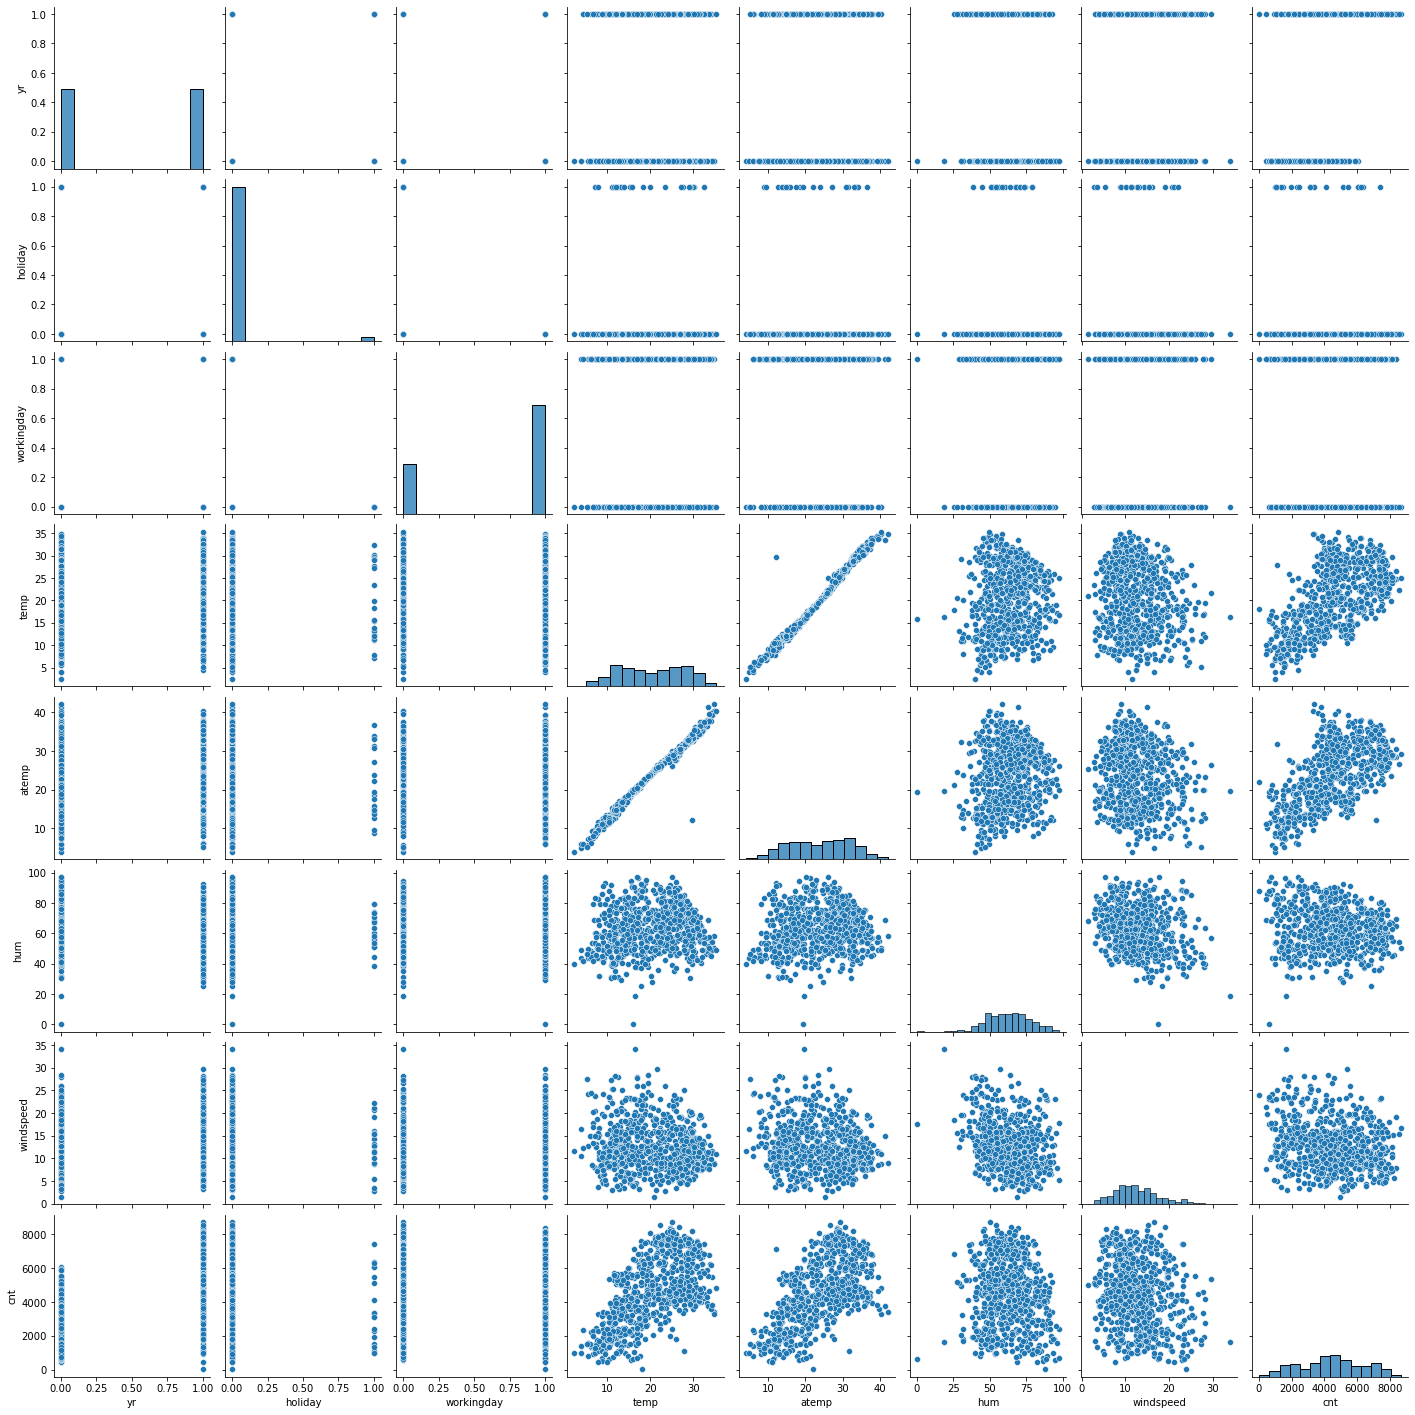

In [16]:
# taking pair plots of all numerical data
sns.pairplot(day)
plt.show()

we can see that cnt is having a almost normal distribution. Also, there are some varibles which are in relation-ship with __cnt__.
<br />
Some of them are __temp__, __atemp__ are in linear relation with __cnt__
<br />
__hum__ and __windspeed__ are related with __cnt__ but not linearly from the above graphs. we will check later on if they help in model building.
<br /> 
we can also see that __temp__ and __atemp__ are perfectly in linear relationship


#### Visualising categorical variables

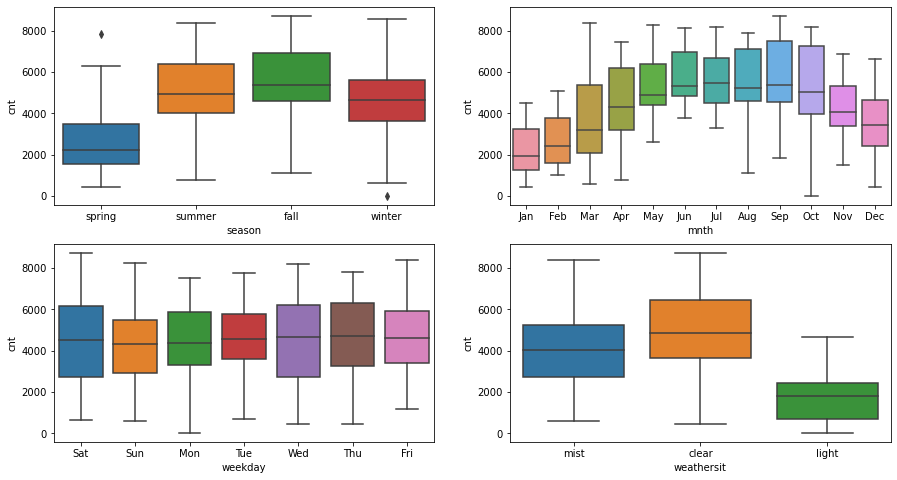

In [17]:
# we will visualise using subplots with boxplots
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt', data=day)

plt.subplot(2,2,2)
sns.boxplot(x='mnth',y='cnt', data=day)

plt.subplot(2,2,3)
sns.boxplot(x='weekday',y='cnt', data=day)

plt.subplot(2,2,4)
sns.boxplot(x='weathersit',y='cnt', data=day)

plt.show()

We can interpret that 
1. spring have less cnt while summer, fall and winter have some more cnt and among these, the medians lie almost nearer to each other
2. There is an increase on cnt duing middle of year compared to start and end of the year
3. all the weekdays have same median but tue have less overall cnt compared to others
4. when weather situation is light rains, the count is very less compared to mist and clear weather situations

#### We will check the corellation coefficients after splitting data to test and train sets

### Step 3: Data preparation

#### Dummy variables

In [18]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# creating dumy varibales for season
# we have 4 levels of season so, we can drop 1 of them as three of the levels can explain all the 4 levels

season_dummies = pd.get_dummies(day.season, drop_first=True)

# concating the dummies to day df
day = pd.concat([day, season_dummies], axis = 1)

# we can drop the original season column now as we have dummy representation which can tell the data
day.drop(columns=['season'],inplace=True)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [20]:
# creating dumy varibales for mnth
# we have 12 levels of months so, we can drop 1 of them as 11 of the levels can explain all the 12 levels

mnth_dummies = pd.get_dummies(day.mnth, drop_first=True)

# concating the dummies to day df
day = pd.concat([day, mnth_dummies], axis = 1)

# we can drop the original mnth column now as we have dummy representation which can tell the data
day.drop(columns=['mnth'],inplace=True)
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [21]:
# creating dumy varibales for weekday
# we have 7 levels of weekdays so, we can drop 1 of them as 6 of the levels can explain all the 7 levels

weekday_dummies = pd.get_dummies(day.weekday, drop_first=True)

# concating the dummies to day df
day = pd.concat([day, weekday_dummies], axis = 1)

# we can drop the original weekday column now as we have dummy representation which can tell the data
day.drop(columns=['weekday'],inplace=True)
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# creating dumy varibales for weathersit
# we can drop one of the 4. Also, we only have values for 3 variables. so dropping 1 level will result in losing data for the 4th level.
# So, we will keep it and left over i.e., all 0 will be 4 th level - high

weathersit_dummies = pd.get_dummies(day.weathersit)

# concating the dummies to day df
day = pd.concat([day, weathersit_dummies], axis = 1)

# we can drop the original column now as we have dummy representation which can tell the data
day.drop(columns=['weathersit'],inplace=True)
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,light,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


In [23]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

we now have all the required data in  numerical terms.<br /> can now proceed further

### Step 4: Splitting the Data into Training and Testing Sets

In [24]:
# creating test train data sets using train_test_split method of sklearn

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
df_train.shape

(510, 31)

#### Now we need to scale the data we have so that the training of model will be easier if all the data is on same scale

##### we will use Min-Max scaling

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the '0-1' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# using fit_transform as the sclare need to learn and then apply transformation
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,light,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we now have all the data between 1 and 0. 

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,light,mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


#### Let's now check the correlation coefficients of the variables

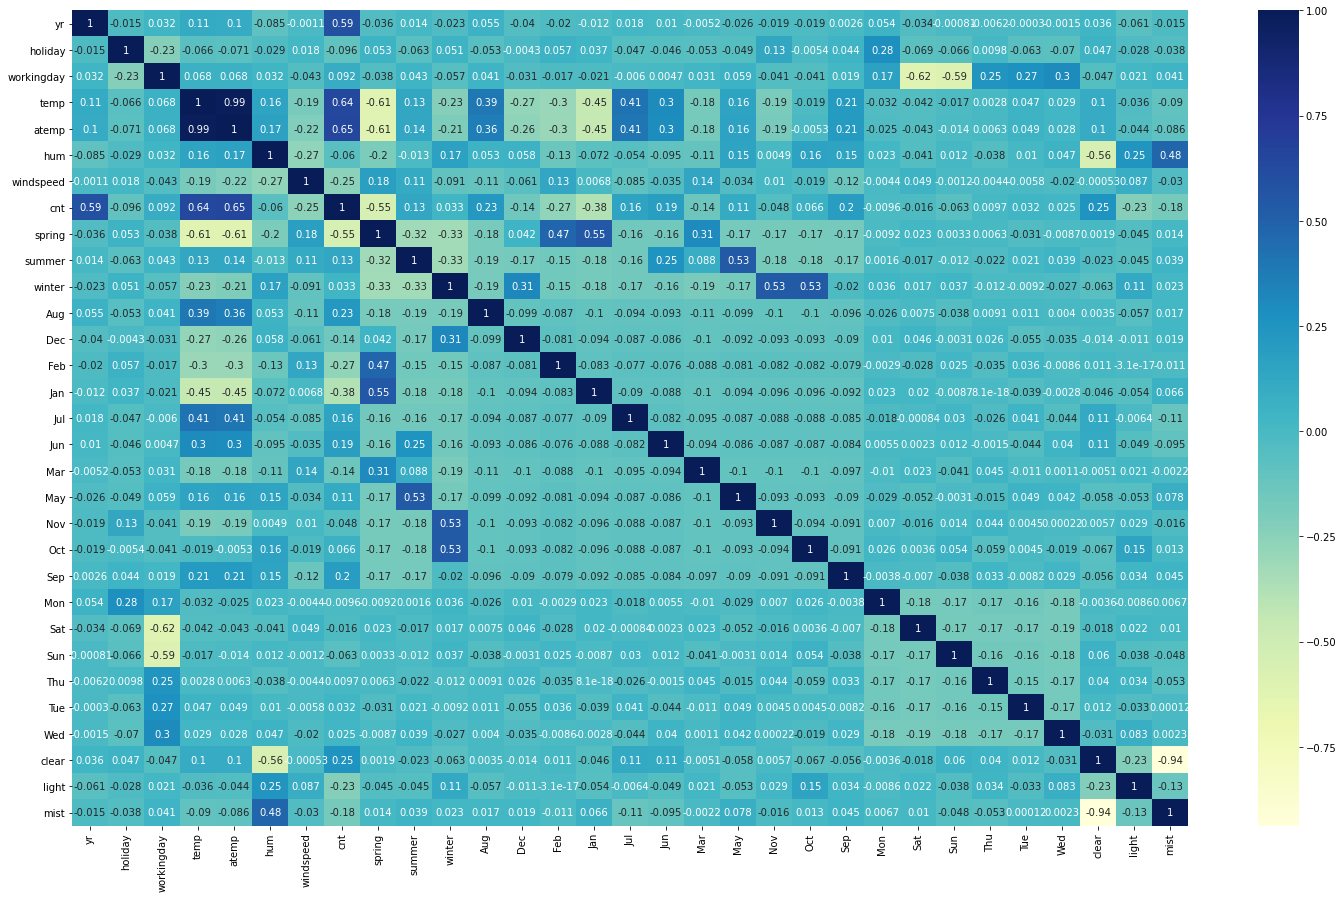

In [30]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

we can see, __cnt__ is highly correlated with atemp, temp, yr and negatively related with spring, jan, feb, light, windspeed.

#### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building Linear Regression model

We will be using __RFE__ to coarse filter the features

In [32]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
# we now have the top features and let's check the ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', False, 5),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 7),
 ('May', False, 13),
 ('Nov', True, 1),
 ('Oct', False, 6),
 ('Sep', False, 15),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 16),
 ('Tue', False, 10),
 ('Wed', False, 14),
 ('clear', True, 1),
 ('light', True, 1),
 ('mist', True, 1)]

In [34]:
# these are the top 15 columns we got.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Aug', 'Jul', 'Jun', 'Nov', 'Sat', 'clear', 'light', 'mist'],
      dtype='object')

In [35]:
# and these are left over columns
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'summer', 'Dec', 'Feb', 'Jan', 'Mar', 'May', 'Oct',
       'Sep', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics
we will now filter the features using statsmodel

In [36]:
# creating function for calculation of VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [37]:
# creating funciton for building model
def build_lm(X_train_param, y_train_param):
    # adding the constant as by default lm will go through origin
    X_train_param = sm.add_constant(X_train_param)
    
    # Running the linear model using OLS method
    lm = sm.OLS(y_train_param, X_train_param).fit()
    
    return lm

#### Model 1

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# build model using funciton
lm = build_lm(X_train_rfe, y_train)

# Let's look at summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.67e-190
Time:                        22:58:26   Log-Likelihood:                 513.26
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     495   BIC:                            -933.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1364      0.028      4.908      0.000       0.082       0.191
yr             0.2292      0.008     28.316      0.000       0.213       0.245
workingday     0.0511      0.011      4.672      0.000       0.030       0.073
temp           0.5591      0.035     15.986      0.000       0.490       0.628
hum           -0.1678      0.038     -4.398      0.000      -0.243      -0.093
windspeed     -0.1856      0.026     -7.272      0.000      -0.236      -0.135
spring        -0.1107      0.015     -7.445      0.000      -0.140      -0.081
winter         0.0583      0.013      4.325      0.000       0.032       0.085
Aug           -0.0640      0.017     -3.796      0.000      -0.097      -0.031
Jul           -0.1255      0.019     -6.542      0.000      -0.163      -0.088
Jun           -0.0544      0.018     -3.006      0.003      -0.090      -0.019
Nov           -0.0332      0.017     -1.946      0.052      -0.067       0.000
Sat            0.0629      0.014      4.458      0.000       0.035       0.091
clear          0.1465      0.010     15.378      0.000       0.128       0.165
light         -0.1002      0.022     -4.502      0.000      -0.144      -0.056
mist           0.0900      0.012      7.496      0.000       0.066       0.114
==============================================================================
Omnibus:                       73.144   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.273
Skew:                          -0.723   Prob(JB):                     1.31e-41
Kurtosis:                       5.602   Cond. No.                     1.24e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# we have p-value for 'Nov' > 0.05, so dropping that column
# dropping temp variable as vif is high
X_train_rfe = X_train_rfe.drop(['Nov'], axis=1)

Building model again

#### Model 2

In [41]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Aug', 'Jul', 'Jun', 'Sat', 'clear', 'light', 'mist'],
      dtype='object')

In [42]:
# build model using funciton
lm = build_lm(X_train_rfe, y_train)

# Let's look at summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.33e-190
Time:                        22:58:26   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1313      0.028      4.733      0.000       0.077       0.186
yr             0.2292      0.008     28.239      0.000       0.213       0.245
workingday     0.0518      0.011      4.729      0.000       0.030       0.073
temp           0.5683      0.035     16.351      0.000       0.500       0.637
hum           -0.1650      0.038     -4.316      0.000      -0.240      -0.090
windspeed     -0.1880      0.026     -7.354      0.000      -0.238      -0.138
spring        -0.1077      0.015     -7.263      0.000      -0.137      -0.079
winter         0.0479      0.012      3.860      0.000       0.024       0.072
Aug           -0.0662      0.017     -3.924      0.000      -0.099      -0.033
Jul           -0.1279      0.019     -6.666      0.000      -0.166      -0.090
Jun           -0.0559      0.018     -3.086      0.002      -0.092      -0.020
Sat            0.0644      0.014      4.555      0.000       0.037       0.092
clear          0.1443      0.009     15.212      0.000       0.126       0.163
light         -0.1010      0.022     -4.526      0.000      -0.145      -0.057
mist           0.0880      0.012      7.337      0.000       0.064       0.112
==============================================================================
Omnibus:                       72.644   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.380
Skew:                          -0.719   Prob(JB):                     3.37e-41
Kurtosis:                       5.589   Cond. No.                     1.19e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

__p-values are almost 0 for all variables__

#### Let's check VIF for corelations between the variables

In [43]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Aug', 'Jul', 'Jun', 'Sat', 'clear', 'light', 'mist'],
      dtype='object')

In [44]:
# Calculate the VIFs for the new model
calc_vif(X_train_rfe)

      Features    VIF
11       clear  41.73
13        mist  29.02
12       light   4.03
2         temp   3.87
5       spring   2.55
3          hum   1.95
6       winter   1.81
1   workingday   1.65
8          Jul   1.64
10         Sat   1.64
7          Aug   1.55
9          Jun   1.43
4    windspeed   1.18
0           yr   1.04


we can now see that the VIF for 'clear' is > 5. So, let's drop temp feature

In [45]:
# dropping clear variable as VIF is high
X_train_rfe = X_train_rfe.drop(['clear'], axis=1)

#### Model 3

building model again

In [46]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Aug', 'Jul', 'Jun', 'Sat', 'light', 'mist'],
      dtype='object')

In [47]:
# build model using funciton
lm = build_lm(X_train_rfe, y_train)

# Let's look at summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          4.33e-190
Time:                        22:58:26   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.033      8.476      0.000       0.212       0.339
yr             0.2292      0.008     28.239      0.000       0.213       0.245
workingday     0.0518      0.011      4.729      0.000       0.030       0.073
temp           0.5683      0.035     16.351      0.000       0.500       0.637
hum           -0.1650      0.038     -4.316      0.000      -0.240      -0.090
windspeed     -0.1880      0.026     -7.354      0.000      -0.238      -0.138
spring        -0.1077      0.015     -7.263      0.000      -0.137      -0.079
winter         0.0479      0.012      3.860      0.000       0.024       0.072
Aug           -0.0662      0.017     -3.924      0.000      -0.099      -0.033
Jul           -0.1279      0.019     -6.666      0.000      -0.166      -0.090
Jun           -0.0559      0.018     -3.086      0.002      -0.092      -0.020
Sat            0.0644      0.014      4.555      0.000       0.037       0.092
light         -0.2453      0.026     -9.315      0.000      -0.297      -0.194
mist          -0.0562      0.011     -5.337      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       72.644   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.380
Skew:                          -0.719   Prob(JB):                     3.37e-41
Kurtosis:                       5.589   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Checking VIF__

In [48]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Aug', 'Jul', 'Jun', 'Sat', 'light', 'mist'],
      dtype='object')

In [49]:
# Calculate the VIFs for the new model
calc_vif(X_train_rfe)

      Features    VIF
3          hum  24.57
2         temp  21.69
1   workingday   4.63
4    windspeed   4.16
5       spring   2.59
12        mist   2.24
6       winter   2.14
0           yr   2.07
10         Sat   1.82
8          Jul   1.77
7          Aug   1.72
9          Jun   1.54
11       light   1.20


__we can see hum has VIF > 5. So, let's drop hum__

In [50]:
# dropping clear variable as VIF is high
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#### Model 4

In [51]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'winter', 'Aug',
       'Jul', 'Jun', 'Sat', 'light', 'mist'],
      dtype='object')

In [52]:
# build model using funciton
lm = build_lm(X_train_rfe, y_train)

# Let's look at summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          2.61e-187
Time:                        22:58:27   Log-Likelihood:                 501.91
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     497   BIC:                            -922.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1870      0.026      7.288      0.000       0.137       0.237
yr             0.2334      0.008     28.457      0.000       0.217       0.249
workingday     0.0547      0.011      4.913      0.000       0.033       0.077
temp           0.5242      0.034     15.507      0.000       0.458       0.591
windspeed     -0.1552      0.025     -6.249      0.000      -0.204      -0.106
spring        -0.1117      0.015     -7.414      0.000      -0.141      -0.082
winter         0.0398      0.012      3.187      0.002       0.015       0.064
Aug           -0.0576      0.017     -3.378      0.001      -0.091      -0.024
Jul           -0.1126      0.019     -5.869      0.000      -0.150      -0.075
Jun           -0.0421      0.018     -2.320      0.021      -0.078      -0.006
Sat            0.0686      0.014      4.785      0.000       0.040       0.097
light         -0.2900      0.025    -11.774      0.000      -0.338      -0.242
mist          -0.0824      0.009     -9.390      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       72.971   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.277
Skew:                          -0.726   Prob(JB):                     5.86e-41
Kurtosis:                       5.571   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# p-value is ok for the above columns after removing the 'hum'

__Checking VIF's__

In [54]:
# Calculate the VIFs for the new model
calc_vif(X_train_rfe)

      Features   VIF
2         temp  8.88
1   workingday  4.48
3    windspeed  4.16
0           yr  2.06
4       spring  1.84
9          Sat  1.79
6          Aug  1.65
7          Jul  1.65
5       winter  1.62
11        mist  1.56
8          Jun  1.48
10       light  1.08


__VIF for temp is also > 5. So, Dropping 'temp'__

In [55]:
# dropping clear variable as VIF is high
X_train_rfe = X_train_rfe.drop(['temp'], axis=1)

#### Model 5

In [56]:
X_train_rfe.columns

Index(['yr', 'workingday', 'windspeed', 'spring', 'winter', 'Aug', 'Jul',
       'Jun', 'Sat', 'light', 'mist'],
      dtype='object')

In [57]:
# build model using funciton
lm = build_lm(X_train_rfe, y_train)

# Let's look at summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          5.07e-146
Time:                        22:58:27   Log-Likelihood:                 401.29
No. Observations:                 510   AIC:                            -778.6
Df Residuals:                     498   BIC:                            -727.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5010      0.019     26.148      0.000       0.463       0.539
yr             0.2469      0.010     24.883      0.000       0.227       0.266
workingday     0.0562      0.014      4.146      0.000       0.030       0.083
windspeed     -0.1887      0.030     -6.268      0.000      -0.248      -0.130
spring        -0.2622      0.014    -18.718      0.000      -0.290      -0.235
winter        -0.0353      0.014     -2.526      0.012      -0.063      -0.008
Aug            0.0535      0.019      2.842      0.005       0.017       0.090
Jul            0.0276      0.021      1.342      0.180      -0.013       0.068
Jun            0.0558      0.021      2.692      0.007       0.015       0.096
Sat            0.0622      0.017      3.566      0.000       0.028       0.097
light         -0.2869      0.030     -9.573      0.000      -0.346      -0.228
mist          -0.0884      0.011     -8.285      0.000      -0.109      -0.067
==============================================================================
Omnibus:                       32.464   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.999
Skew:                          -0.355   Prob(JB):                     6.31e-16
Kurtosis:                       4.671   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# p-value for Jul is > 0.05.

__Dropping 'Jul'__

In [59]:
# dropping clear variable as VIF is high
X_train_rfe = X_train_rfe.drop(['Jul'], axis=1)

#### Model 6

In [60]:
X_train_rfe.columns

Index(['yr', 'workingday', 'windspeed', 'spring', 'winter', 'Aug', 'Jun',
       'Sat', 'light', 'mist'],
      dtype='object')

In [61]:
# build model without using funciton for later purpose
# adding the constant as by default lm will go through origin
X_train_lm = sm.add_constant(X_train_rfe)
    
# Running the linear model using OLS method
lm = sm.OLS(y_train, X_train_lm).fit()

# Let's look at summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.3
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          9.64e-147
Time:                        22:58:27   Log-Likelihood:                 400.37
No. Observations:                 510   AIC:                            -778.7
Df Residuals:                     499   BIC:                            -732.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5095      0.018     28.134      0.000       0.474       0.545
yr             0.2471      0.010     24.882      0.000       0.228       0.267
workingday     0.0558      0.014      4.117      0.000       0.029       0.082
windspeed     -0.1929      0.030     -6.437      0.000      -0.252      -0.134
spring        -0.2683      0.013    -20.218      0.000      -0.294      -0.242
winter        -0.0417      0.013     -3.168      0.002      -0.068      -0.016
Aug            0.0470      0.018      2.581      0.010       0.011       0.083
Jun            0.0490      0.020      2.438      0.015       0.010       0.089
Sat            0.0624      0.017      3.573      0.000       0.028       0.097
light         -0.2875      0.030     -9.583      0.000      -0.346      -0.229
mist          -0.0903      0.011     -8.533      0.000      -0.111      -0.069
==============================================================================
Omnibus:                       33.098   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.403
Skew:                          -0.367   Prob(JB):                     5.15e-16
Kurtosis:                       4.665   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__P-values are ok__

__Checking VIF__

In [62]:
# Calculate the VIFs for the new model
calc_vif(X_train_rfe)

     Features   VIF
2   windspeed  3.47
1  workingday  3.25
0          yr  1.89
3      spring  1.63
7         Sat  1.57
4      winter  1.52
9        mist  1.52
5         Aug  1.23
6         Jun  1.17
8       light  1.08


__VIF values are < 5__

#### We now have model with all significant variables (p-value < 0.05) and features with VIF (value < 5)

In [63]:
lm.params

const         0.509495
yr            0.247068
workingday    0.055790
windspeed    -0.192876
spring       -0.268305
winter       -0.041714
Aug           0.046972
Jun           0.049048
Sat           0.062389
light        -0.287467
mist         -0.090265
dtype: float64

we have __const as 0.509495__

In [64]:
# we have coefficients as displayed above

from the statsmodels statistics we can see that <br />
__F-statistic is 156.3__ <br />
__Prob (F-statistic) is 9.64e-147__

In [65]:
# From this we can say that the model is not by chance as the probability of f-statistic is almost 0.

We got <br />
__R-squared as 0.758__ <br />
__Adj. R-squared as 0.753__

### Step 6: Residual Analysis of the train data

In [66]:
# predicting cnt from the model
y_train_pred = lm.predict(X_train_lm)

In [67]:
res = (y_train - y_train_pred)

Text(0.5, 0, 'Errors')

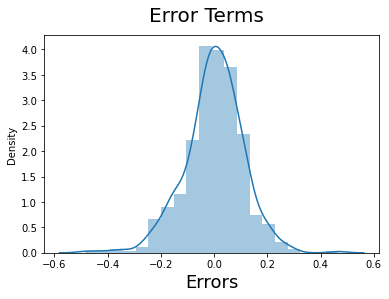

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### we have a normal distribution for error terms

### Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [69]:
# Apply scaler() to all the columns except the '0-1' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# using fit_transform as the sclare need to learn and then apply transformation
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [70]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,light,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test

In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)


In [73]:
# Making predictions
y_test_pred = lm.predict(X_test_rfe)

### Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

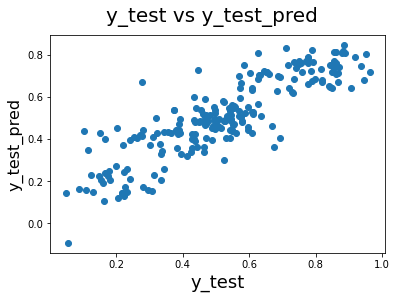

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

### R^2 Value for TEST

In [75]:
r2Score = r2_score(y_test, y_test_pred)
r2Score

0.7397076160339788

R-Squared value for test is __0.7397__. Which is very similar to train R-squared value - __0.758__

### Adjusted R^2 Value for TEST

In [76]:
# We already have the value of R^2 (calculated in above step)

r2Score

0.7397076160339788

In [80]:
# Get the shape of X_test

X_test_rfe.shape

(219, 11)

In [81]:
# n is number of rows in X

n = X_test_rfe.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_rfe.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
adjusted_r2

0.7258756536010018

__we have adjusted R2 value as 0.72__ which is close to train data set adj. R2 : __0.75__

### Our madel const and co-eff are as follows:

In [82]:
lm.params

const         0.509495
yr            0.247068
workingday    0.055790
windspeed    -0.192876
spring       -0.268305
winter       -0.041714
Aug           0.046972
Jun           0.049048
Sat           0.062389
light        -0.287467
mist         -0.090265
dtype: float64

## From this we can say 

__a.	Positive contributions: ‘yr - 2019’, ‘Sat’ weekday, ‘workingday’ <br />
b.	Negative contribution: ‘Light’ weather situation, ‘spring’ season, ‘windspeed’__